In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 30)

In [2]:
# reading in raw data

# set data types
cols = ['PROJECT_ID', 'ABSTRACT', 'FY.x', 'PROJECT_TERMS', 'PROJECT_TITLE', 'DEPARTMENT', 'AGENCY', 'IC_CENTER', 
        'PROJECT_NUMBER', 'PROJECT_START_DATE', 'PROJECT_END_DATE', 'CONTACT_PI_PROJECT_LEADER', 'OTHER_PIS', 
        'CONGRESSIONAL_DISTRICT', 'DUNS_NUMBER', 'ORGANIZATION_NAME', 'ORGANIZATION_CITY', 'ORGANIZATION_STATE', 
        'ORGANIZATION_ZIP', 'ORGANIZATION_COUNTRY', 'BUDGET_START_DATE', 'BUDGET_END_DATE', 'CFDA_CODE', 'FY.y', 
        'FY_TOTAL_COST', 'FY_TOTAL_COST_SUB_PROJECTS']
dtypes = {col: 'str' for col in cols}
dtypes["FY_TOTAL_COST"] = 'float'
dtypes["FY_TOTAL_COST_SUB_PROJECTS"] = 'float'

df = pd.read_csv('../../data/original/working_federal_reporter_2020.csv', dtype = dtypes, engine='python')
print(df.shape)


(1156137, 26)


In [3]:
df.head()

,PROJECT_ID,ABSTRACT,FY.x,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS
0,89996,"This is a project to explore Game-based, Metap...",2008,Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,"REESE, DEBBIE D","CARTER, BEVERLY; WOOD, CHARLES; HITT, BEN",01,068719400,WHEELING JESUIT UNIVERSITY,WHEELING,WV,26003-6243,UNITED STATES,NaN,NaN,47.076,2008,1999467.0,NaN
1,89997,Institution: Franklin Institute Science Museum...,2008,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,"SNYDER, STEVEN","ELINICH, KAREN; YOON, SUSAN",02,001741859,FRANKLIN INSTITUTE,PHILADELPHIA,PA,19103-1115,UNITED STATES,NaN,NaN,47.076,2008,1799699.0,NaN
2,89998,Through programs (including small group conver...,2008,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,"FINK, LAURIE KLEINBAUM","CADIGAN, KAREN; ELLENBOGEN, KIRSTEN",04,061451670,SCIENCE MUSEUM OF MINNESOTA,SAINT PAUL,MN,55102-1202,UNITED STATES,NaN,NaN,47.076,2008,1505858.0,NaN
3,89999,In partnership with the American Chemical Soci...,2008,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,"JOST, JOHN W","MILLER, BRADLEY; BOWMAN, KATHERINE",04,009059242,INTERNATIONAL UNION OF PURE AND APPLIED CHEMISTRY,DURHAM,NC,27709-3757,UNITED STATES,NaN,NaN,47.049,2008,51000.0,NaN
4,90000,Amphibian populations around the world are exp...,2008,Amphibia; Central America; Communicable Diseas...,COLLABORATIVE RESEARCH: EVOLUTION OF AMPHIBIAN...,NSF,NSF,NaN,0815315,10/1/2008,9/30/2011,"ZAMUDIO, KELLY R",NaN,22,872612445,CORNELL UNIVERSITY ITHACA,ITHACA,NY,14850-2820,UNITED STATES,NaN,NaN,47.074,2008,370996.0,NaN


In [4]:
list(df.columns)

['PROJECT_ID',
 'ABSTRACT',
 'FY.x',
 'PROJECT_TERMS',
 'PROJECT_TITLE',
 'DEPARTMENT',
 'AGENCY',
 'IC_CENTER',
 'PROJECT_NUMBER',
 'PROJECT_START_DATE',
 'PROJECT_END_DATE',
 'CONTACT_PI_PROJECT_LEADER',
 'OTHER_PIS',
 'CONGRESSIONAL_DISTRICT',
 'DUNS_NUMBER',
 'ORGANIZATION_NAME',
 'ORGANIZATION_CITY',
 'ORGANIZATION_STATE',
 'ORGANIZATION_ZIP',
 'ORGANIZATION_COUNTRY',
 'BUDGET_START_DATE',
 'BUDGET_END_DATE',
 'CFDA_CODE',
 'FY.y',
 'FY_TOTAL_COST',
 'FY_TOTAL_COST_SUB_PROJECTS']

In [5]:
df.dtypes

PROJECT_ID                     object
ABSTRACT                       object
FY.x                           object
PROJECT_TERMS                  object
PROJECT_TITLE                  object
DEPARTMENT                     object
AGENCY                         object
IC_CENTER                      object
PROJECT_NUMBER                 object
PROJECT_START_DATE             object
PROJECT_END_DATE               object
CONTACT_PI_PROJECT_LEADER      object
OTHER_PIS                      object
CONGRESSIONAL_DISTRICT         object
DUNS_NUMBER                    object
ORGANIZATION_NAME              object
ORGANIZATION_CITY              object
ORGANIZATION_STATE             object
ORGANIZATION_ZIP               object
ORGANIZATION_COUNTRY           object
BUDGET_START_DATE              object
BUDGET_END_DATE                object
CFDA_CODE                      object
FY.y                           object
FY_TOTAL_COST                 float64
FY_TOTAL_COST_SUB_PROJECTS    float64
dtype: objec

In [6]:
# look at missingness n

df.isnull().sum()

PROJECT_ID                          0
ABSTRACT                        42380
FY.x                            35035
PROJECT_TERMS                    4022
PROJECT_TITLE                       0
DEPARTMENT                          0
AGENCY                              0
IC_CENTER                      622428
PROJECT_NUMBER                      0
PROJECT_START_DATE             154926
PROJECT_END_DATE               146332
CONTACT_PI_PROJECT_LEADER          45
OTHER_PIS                     1012458
CONGRESSIONAL_DISTRICT          74483
DUNS_NUMBER                     14565
ORGANIZATION_NAME                1658
ORGANIZATION_CITY                5926
ORGANIZATION_STATE              17001
ORGANIZATION_ZIP                48995
ORGANIZATION_COUNTRY             5705
BUDGET_START_DATE              659654
BUDGET_END_DATE                659705
CFDA_CODE                      201355
FY.y                               19
FY_TOTAL_COST                  287698
FY_TOTAL_COST_SUB_PROJECTS    1082117
dtype: int64

In [7]:
# look at missingness %

(df.isnull().sum()/len(df))*100

PROJECT_ID                     0.000000
ABSTRACT                       3.665656
FY.x                           3.030350
PROJECT_TERMS                  0.347883
PROJECT_TITLE                  0.000000
DEPARTMENT                     0.000000
AGENCY                         0.000000
IC_CENTER                     53.836872
PROJECT_NUMBER                 0.000000
PROJECT_START_DATE            13.400315
PROJECT_END_DATE              12.656978
CONTACT_PI_PROJECT_LEADER      0.003892
OTHER_PIS                     87.572494
CONGRESSIONAL_DISTRICT         6.442403
DUNS_NUMBER                    1.259799
ORGANIZATION_NAME              0.143409
ORGANIZATION_CITY              0.512569
ORGANIZATION_STATE             1.470500
ORGANIZATION_ZIP               4.237820
ORGANIZATION_COUNTRY           0.493454
BUDGET_START_DATE             57.056733
BUDGET_END_DATE               57.061144
CFDA_CODE                     17.416189
FY.y                           0.001643
FY_TOTAL_COST                 24.884421


## Find a missing start date example

In [8]:
temp = df[df['PROJECT_START_DATE'].isnull()]

In [11]:
temp2 = temp[['ABSTRACT', 'PROJECT_START_DATE', 'BUDGET_START_DATE', 'FY.x']]

In [24]:
temp2[105050:105100]

,ABSTRACT,PROJECT_START_DATE,BUDGET_START_DATE,FY.x
821633,Emerging evidence suggests that an epigenetic ...,NaN,4/1/2016,2016
821640,"This facility, operating since 1990, provides ...",NaN,7/1/2016,2016
821647,The objective of this Core is to provide seque...,NaN,7/1/2016,2016
821652,SUMMARY: PROJECT 2There is a lack of understan...,NaN,4/1/2016,2016
821653,PROJECT SUMMARY: PROJECT 4 Non-vaccine biomedi...,NaN,8/1/2016,2016
821654,The Quantitative and Functional HDL Core (Core...,NaN,5/1/2016,2016
821659,Training and Education Program - Abstract Incr...,NaN,9/1/2016,2016
821663,Waldmann co-discovered the cytokine IL-15 and ...,NaN,NaN,2016
821670,The Prevention Core will provide the infrastru...,NaN,5/1/2016,2016
821671,PROJECT SUMMARY (See instructions); This is an...,NaN,5/1/2016,2016


In [51]:
# remove null abstract entries and look again at missingness

l1 = len(df)
df = df.loc[pd.notnull(df['ABSTRACT'])]
l2 = len(df)
    
print(l1-l2, "nulls. These rows removed.")


42380 nulls. These rows removed.


In [52]:
sum(df['ABSTRACT'].apply(len) == 0)

0

In [53]:
# look at missingness n

df.isnull().sum()

PROJECT_ID                          0
ABSTRACT                            0
FY.x                                0
PROJECT_TERMS                    3542
PROJECT_TITLE                       0
DEPARTMENT                          0
AGENCY                              0
IC_CENTER                      596842
PROJECT_NUMBER                      0
PROJECT_START_DATE             150344
PROJECT_END_DATE               142110
CONTACT_PI_PROJECT_LEADER          43
OTHER_PIS                      970506
CONGRESSIONAL_DISTRICT          69270
DUNS_NUMBER                     12047
ORGANIZATION_NAME                1626
ORGANIZATION_CITY                5548
ORGANIZATION_STATE              12169
ORGANIZATION_ZIP                46167
ORGANIZATION_COUNTRY             5341
BUDGET_START_DATE              633739
BUDGET_END_DATE                633790
CFDA_CODE                      193344
FY.y                               19
FY_TOTAL_COST                  276557
FY_TOTAL_COST_SUB_PROJECTS    1042708
dtype: int64

In [54]:
# look at missingness %

(df.isnull().sum()/len(df))*100

PROJECT_ID                     0.000000
ABSTRACT                       0.000000
FY.x                           0.000000
PROJECT_TERMS                  0.318023
PROJECT_TITLE                  0.000000
DEPARTMENT                     0.000000
AGENCY                         0.000000
IC_CENTER                     53.588170
PROJECT_NUMBER                 0.000000
PROJECT_START_DATE            13.498815
PROJECT_END_DATE              12.759516
CONTACT_PI_PROJECT_LEADER      0.003861
OTHER_PIS                     87.138038
CONGRESSIONAL_DISTRICT         6.219490
DUNS_NUMBER                    1.081654
ORGANIZATION_NAME              0.145992
ORGANIZATION_CITY              0.498134
ORGANIZATION_STATE             1.092608
ORGANIZATION_ZIP               4.145159
ORGANIZATION_COUNTRY           0.479548
BUDGET_START_DATE             56.901012
BUDGET_END_DATE               56.905591
CFDA_CODE                     17.359622
FY.y                           0.001706
FY_TOTAL_COST                 24.831000


In [73]:
df['FY.x'].value_counts().sort_index(ascending = True)

2008     99866
2009    114017
2010    105937
2011     92893
2012     86338
2013     86724
2014     86524
2015     88454
2016     89462
2017     87906
2018     95757
2019     79879
Name: FY.x, dtype: int64

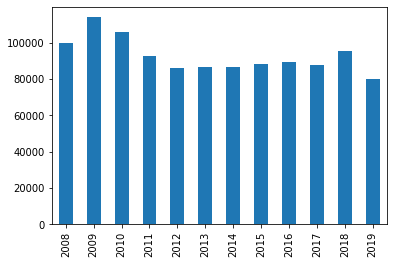

In [58]:
df['FY.x'].value_counts().sort_index(ascending = True).plot(kind = 'bar')

In [60]:
df.groupby(['FY.x']).sum()

,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS
FY.x,,
2008,3.270055e+10,1.600000e+01
2009,3.984187e+10,9.000000e+00
2010,4.015744e+10,2.000000e+01
2011,3.292178e+10,2.700000e+01
2012,3.219332e+10,2.815470e+09
2013,3.123542e+10,1.200000e+01
2014,1.140000e+02,3.700000e+01
2015,3.310646e+10,3.164933e+09
2016,3.587378e+10,3.192287e+09


In [63]:
sum(df[df['FY.x'] == '2014']['FY_TOTAL_COST'].isnull())

86410

In [65]:
# Looking into duplicates - 1. exact duplicate rows

sum(df.duplicated())  # 0

0

In [68]:
# 2. looking at duplicate abstracts, titles, years

print(sum(df.duplicated(subset = ['ABSTRACT', 'PROJECT_TITLE'])))  # 523,688

print(sum(df.duplicated(subset = ['ABSTRACT', 'PROJECT_TITLE', 'FY.x']))) # 65,586

523688
65586


In [69]:
print(sum(df.duplicated(subset = ['ABSTRACT', 'FY.x'])))  # 79,184

79184


In [70]:
print(sum(df.duplicated(subset = ['ABSTRACT']))) # 535,544

535544


In [74]:
df[df.duplicated(subset = ['ABSTRACT', 'PROJECT_TITLE'])].head(50)

,PROJECT_ID,ABSTRACT,FY.x,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS
13,89993,Amphibian populations around the world are exp...,2008,Amphibia; Central America; Communicable Diseas...,COLLABORATIVE RESEARCH: EVOLUTION OF AMPHIBIAN...,NSF,NSF,NaN,0815288,10/1/2008,3/31/2009,"LIPS, KAREN R",NaN,12,939007555,SOUTHERN ILLINOIS UNIVERSITY CARBONDALE,CARBONDALE,IL,62901-4709,UNITED STATES,NaN,NaN,47.074,2008,NaN,NaN
48,90044,The Alboran Sea was created in the wake of the...,2008,Africa; Area; Atlases; Automobile Driving; Awa...,COLLABORATIVE RESEARCH: PICASSO: PROGRAM TO IN...,NSF,NSF,NaN,0808931,10/1/2008,3/31/2012,"HUMPHREYS, EUGENE D",NaN,04,948117312,UNIVERSITY OF OREGON,EUGENE,OR,97403-5219,UNITED STATES,NaN,NaN,47.050,2008,923000.0,NaN
50,89970,"Over the past century, rapid growth of human p...",2008,Address; Affect; Area; base; Behavior; Biodive...,CNH: COLLABORATIVE RESEARCH: INTEGRATED DYNAMI...,NSF,NSF,NaN,0814424,10/1/2008,3/31/2012,"RADELOFF, VOLKER C","LEWIS, DAVID; RADELOFF, VOLKER",02,003255648,UNIVERSITY OF WISCONSIN SYSTEM,MADISON,WI,53715-1218,UNITED STATES,NaN,NaN,47.075,2008,486622.0,NaN
58,89968,"Over the past century, rapid growth of human p...",2008,Address; Affect; Area; base; Behavior; Biodive...,CNH: COLLABORATIVE RESEARCH: INTEGRATED DYNAMI...,NSF,NSF,NaN,0814628,10/1/2008,3/31/2012,"POLASKY, STEPHEN",NaN,05,555917996,UNIVERSITY OF MINNESOTA TWIN CITIES,MINNEAPOLIS,MN,55455-5200,UNITED STATES,NaN,NaN,47.075,2008,234003.0,NaN
61,90057,Designing a response to global climate change ...,2008,Climate; climate change; cost; Costs and Benef...,COLLABORATIVE RESEARCH: DRU: AN IMPROVED MODEL...,NSF,NSF,NaN,0825932,9/15/2008,8/31/2011,"POPP, DAVID C",NaN,08,054552435,NATIONAL BUREAU OF ECONOMIC RESEARCH,CAMBRIDGE,MA,02138-5317,UNITED STATES,NaN,NaN,47.075,2008,105756.0,NaN
70,89967,"Over the past century, rapid growth of human p...",2008,Address; Affect; Area; base; Behavior; Biodive...,CNH: COLLABORATIVE RESEARCH: INTEGRATED DYNAMI...,NSF,NSF,NaN,0814292,10/1/2008,3/31/2012,"LONSDORF, ERIC V",NaN,05,068634179,LINCOLN PARK ZOOLOGICAL SOCIETY,CHICAGO,IL,60614-4757,UNITED STATES,NaN,NaN,47.075,2008,6000.0,NaN
84,90080,"Grassland degradation is a global concern, aff...",2008,Adopted; Affect; base; Biodiversity; Biologica...,CNH: COLLABORATIVE RESEARCH: DETERMINANTS OF G...,NSF,NSF,NaN,0814707,9/15/2008,8/31/2013,"YEH, EMILY T",NaN,02,007431505,UNIVERSITY OF COLORADO AT BOULDER,BOULDER,CO,80309-0572,UNITED STATES,NaN,NaN,47.075,2008,203546.0,NaN
86,90082,The Alboran Sea was created in the wake of the...,2008,Africa; Area; Atlases; Automobile Driving; Awa...,COLLABORATIVE RESEARCH: PICASSO: PROGRAM TO IN...,NSF,NSF,NaN,0808939,10/1/2008,9/30/2012,"LEVANDER, ALAN R","LEE, CIN-TY",07,050299031,RICE UNIVERSITY,HOUSTON,TX,77005-1827,UNITED STATES,NaN,NaN,47.050,2008,506332.0,NaN
98,90094,The Alboran Sea was created in the wake of the...,2008,Africa; Area; Atlases; Automobile Driving; Awa...,COLLABORATIVE RESEARCH: PICASSO: PROGRAM TO IN...,NSF,NSF,NaN,0809074,10/1/2008,9/30/2012,"EVANS, ROBERT L","CHAVE, ALAN",10,001766682,WOODS HOLE OCEANOGRAPHIC INSTITUTION,WOODS HOLE,MA,02543-1041,UNITED STATES,NaN,NaN,47.050,2008,641499.0,NaN
134,89949,"Over the past century, rapid growth of human p...",2008,Address; Affect; Area; base; Behavior; Biodive...,CNH: COLLABORATIVE RESEARCH: INTEGRATED DYNAMI...,NSF,NSF,NaN,0816303,10/1/2008,3/31/2012,"KAREIVA, PETER M",NaN,15,054800214,SANTA CLARA UNIVERSITY,SANTA CLARA,CA,95053-0250,UNITED STATES,NaN,NaN,47.075,2008,30000.0,NaN


In [76]:
print(sum(df.duplicated('PROJECT_ID'))) # 0
print(sum(df.duplicated('PROJECT_NUMBER'))) # 6,454 -- ask Sean about this

0
6454


In [77]:
df[pd.notnull(df['FY_TOTAL_COST_SUB_PROJECTS'])]

,PROJECT_ID,ABSTRACT,FY.x,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS
28279,165132,People living in different areas may differ in...,2008,Accounting; Address; Affect; Age; aged; Americ...,NEIGHBORHOOD EFFECTS ON CANCER COURSE IN THE AGED,HHS,NIH,NaN,1P01AG031093-01 (8764),4/15/2008,3/31/2013,"LAMONT, ELIZABETH B",NaN,07,047006379,HARVARD UNIVERSITY,BOSTON,MA,021156027,UNITED STATES,NaN,NaN,NaN,2008,NaN,1.0
41766,178354,Affecting up to 10% of women of reproductive a...,2008,5'-AMP-activated protein kinase; adenylate kin...,PHARMACOGENETICS OF METFORMIN ACTION IN PCOS,HHS,NIH,NaN,2U54HD034449-12A1 (0005),4/1/2008,3/31/2013,"NESTLER, JOHN E",NaN,04,105300446,VIRGINIA COMMONWEALTH UNIVERSITY,RICHMOND,VA,232980568,UNITED STATES,NaN,NaN,NaN,2008,NaN,1.0
54014,191159,A. SPECIFIC AIMSThe TGF-¿ signaling system is ...,2008,activin A; Activins; Affect; Affinity; base; B...,TGF-BETA LIGAND COMPLEXES IN OVARIAN DEVELOPMENT,HHS,NIH,NaN,2U54HD041857-06 (0006),4/23/2003,3/31/2013,"JARDETZKY, THEODORE S",NaN,07,005436803,NORTHWESTERN UNIVERSITY AT CHICAGO,CHICAGO,IL,606113152,UNITED STATES,NaN,NaN,NaN,2008,NaN,1.0
70574,230292,Training and Career DevelopmentThe effective r...,2008,anticancer research; base; Cancer Research Net...,TRAINING AND DEVELOPMENT,HHS,NIH,NaN,1P20CA137219-01 (0001),9/1/2008,8/31/2013,"DEARING, JAMES WILLIAM",NaN,13,150829349,KAISER FOUNDATION RESEARCH INSTITUTE,OAKLAND,CA,946123466,UNITED STATES,NaN,NaN,NaN,2008,NaN,1.0
71520,234930,"Through the Mental Health Services Act (MHSA, ...",2008,Adverse effects; Antipsychotic Agents; Califor...,STARKS NEW INVESTIGATOR PILOT,HHS,NIH,NaN,1P30MH082760-01 (0003),9/5/2008,6/30/2011,"STARKS, SARAH LINSLEY",NaN,33,092530369,UNIVERSITY OF CALIFORNIA LOS ANGELES,LOS ANGELES,CA,900952000,UNITED STATES,NaN,NaN,NaN,2008,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120517,1162037,"P2. AbstractIn this project, we will test our ...",2019,Affect; Architecture; base; Binding; Binding P...,PROJECT 2: CAPSID DYNAMICS AND INTERACTIONS W...,HHS,NIH,NIAID,8P50AI150481-13 (6871),NaN,NaN,"POLENOVA, TATYANA",NaN,18,004514360,THE UNIVERSITY OF PITTSBURGH,PITTSBURGH,PA,152132303,UNITED STATES,8/1/2019,7/31/2020,NaN,2019,NaN,86152.0
1120576,1164443,Summary / AbstractThe objective of the current...,2019,Adrenalectomy; Animals; base; Biomedical Resea...,CORE C: METABOLIC PHENOTYPING CORE,HHS,NIH,NHLBI,7P01HL084207-12 (8561),NaN,NaN,"GROBE, JUSTIN L",NaN,05,937639060,MEDICAL COLLEGE OF WISCONSIN,MILWAUKEE,WI,532263548,UNITED STATES,7/1/2019,6/30/2020,NaN,2019,NaN,55406.0
1120635,1166921,Administrative Core AbstractThe PCHPI will est...,2019,Area; Award; Biology; Cells; Collaborations; C...,ADMINISTRATIVE CORE,HHS,NIH,NIAID,8P50AI150481-13 (6863),NaN,NaN,"GRONENBORN, ANGELA M.",NaN,18,004514360,THE UNIVERSITY OF PITTSBURGH,PITTSBURGH,PA,152132303,UNITED STATES,8/1/2019,7/31/2020,NaN,2019,NaN,712939.0
1120661,1168183,SummaryThe goal of this Project is to understa...,2019,Affinity; Binding; Capsid; Cell membrane; Cell...,PROJECT 3 - GENOME RECOGNITION & PACKAGING,HHS,NIH,NIAID,8U54AI150470-08 (6961),NaN,NaN,"SUMMERS, MICHAEL FINLEY",NaN,12,073133571,UNIVERSITY OF MICHIGAN AT ANN ARBOR,ANN ARBOR,MI,481091276,UNITED STATES,9/1/2019,8/31/2020,NaN,2019,NaN,428544.0


In [78]:
t = df[df.duplicated(subset = ['ABSTRACT', 'PROJECT_TITLE'])]

In [79]:
t.head(10)

,PROJECT_ID,ABSTRACT,FY.x,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS
13,89993,Amphibian populations around the world are exp...,2008,Amphibia; Central America; Communicable Diseas...,COLLABORATIVE RESEARCH: EVOLUTION OF AMPHIBIAN...,NSF,NSF,NaN,0815288,10/1/2008,3/31/2009,"LIPS, KAREN R",NaN,12,939007555,SOUTHERN ILLINOIS UNIVERSITY CARBONDALE,CARBONDALE,IL,62901-4709,UNITED STATES,NaN,NaN,47.074,2008,NaN,NaN
48,90044,The Alboran Sea was created in the wake of the...,2008,Africa; Area; Atlases; Automobile Driving; Awa...,COLLABORATIVE RESEARCH: PICASSO: PROGRAM TO IN...,NSF,NSF,NaN,0808931,10/1/2008,3/31/2012,"HUMPHREYS, EUGENE D",NaN,04,948117312,UNIVERSITY OF OREGON,EUGENE,OR,97403-5219,UNITED STATES,NaN,NaN,47.050,2008,923000.0,NaN
50,89970,"Over the past century, rapid growth of human p...",2008,Address; Affect; Area; base; Behavior; Biodive...,CNH: COLLABORATIVE RESEARCH: INTEGRATED DYNAMI...,NSF,NSF,NaN,0814424,10/1/2008,3/31/2012,"RADELOFF, VOLKER C","LEWIS, DAVID; RADELOFF, VOLKER",02,003255648,UNIVERSITY OF WISCONSIN SYSTEM,MADISON,WI,53715-1218,UNITED STATES,NaN,NaN,47.075,2008,486622.0,NaN
58,89968,"Over the past century, rapid growth of human p...",2008,Address; Affect; Area; base; Behavior; Biodive...,CNH: COLLABORATIVE RESEARCH: INTEGRATED DYNAMI...,NSF,NSF,NaN,0814628,10/1/2008,3/31/2012,"POLASKY, STEPHEN",NaN,05,555917996,UNIVERSITY OF MINNESOTA TWIN CITIES,MINNEAPOLIS,MN,55455-5200,UNITED STATES,NaN,NaN,47.075,2008,234003.0,NaN
61,90057,Designing a response to global climate change ...,2008,Climate; climate change; cost; Costs and Benef...,COLLABORATIVE RESEARCH: DRU: AN IMPROVED MODEL...,NSF,NSF,NaN,0825932,9/15/2008,8/31/2011,"POPP, DAVID C",NaN,08,054552435,NATIONAL BUREAU OF ECONOMIC RESEARCH,CAMBRIDGE,MA,02138-5317,UNITED STATES,NaN,NaN,47.075,2008,105756.0,NaN
70,89967,"Over the past century, rapid growth of human p...",2008,Address; Affect; Area; base; Behavior; Biodive...,CNH: COLLABORATIVE RESEARCH: INTEGRATED DYNAMI...,NSF,NSF,NaN,0814292,10/1/2008,3/31/2012,"LONSDORF, ERIC V",NaN,05,068634179,LINCOLN PARK ZOOLOGICAL SOCIETY,CHICAGO,IL,60614-4757,UNITED STATES,NaN,NaN,47.075,2008,6000.0,NaN
84,90080,"Grassland degradation is a global concern, aff...",2008,Adopted; Affect; base; Biodiversity; Biologica...,CNH: COLLABORATIVE RESEARCH: DETERMINANTS OF G...,NSF,NSF,NaN,0814707,9/15/2008,8/31/2013,"YEH, EMILY T",NaN,02,007431505,UNIVERSITY OF COLORADO AT BOULDER,BOULDER,CO,80309-0572,UNITED STATES,NaN,NaN,47.075,2008,203546.0,NaN
86,90082,The Alboran Sea was created in the wake of the...,2008,Africa; Area; Atlases; Automobile Driving; Awa...,COLLABORATIVE RESEARCH: PICASSO: PROGRAM TO IN...,NSF,NSF,NaN,0808939,10/1/2008,9/30/2012,"LEVANDER, ALAN R","LEE, CIN-TY",07,050299031,RICE UNIVERSITY,HOUSTON,TX,77005-1827,UNITED STATES,NaN,NaN,47.050,2008,506332.0,NaN
98,90094,The Alboran Sea was created in the wake of the...,2008,Africa; Area; Atlases; Automobile Driving; Awa...,COLLABORATIVE RESEARCH: PICASSO: PROGRAM TO IN...,NSF,NSF,NaN,0809074,10/1/2008,9/30/2012,"EVANS, ROBERT L","CHAVE, ALAN",10,001766682,WOODS HOLE OCEANOGRAPHIC INSTITUTION,WOODS HOLE,MA,02543-1041,UNITED STATES,NaN,NaN,47.050,2008,641499.0,NaN
134,89949,"Over the past century, rapid growth of human p...",2008,Address; Affect; Area; base; Behavior; Biodive...,CNH: COLLABORATIVE RESEARCH: INTEGRATED DYNAMI...,NSF,NSF,NaN,0816303,10/1/2008,3/31/2012,"KAREIVA, PETER M",NaN,15,054800214,SANTA CLARA UNIVERSITY,SANTA CLARA,CA,95053-0250,UNITED STATES,NaN,NaN,47.075,2008,30000.0,NaN


In [ ]:
# aggregate pis, etc. give max dates for start and end

In [ ]:
# find example of abstract repeated in next year

# Missingness of FY Total Cost for 2014

In [5]:
df.isnull().sum()

PROJECT_ID                          0
ABSTRACT                        42380
FY.x                            35035
PROJECT_TERMS                    4022
PROJECT_TITLE                       0
DEPARTMENT                          0
AGENCY                              0
IC_CENTER                      622428
PROJECT_NUMBER                      0
PROJECT_START_DATE             154926
PROJECT_END_DATE               146332
CONTACT_PI_PROJECT_LEADER          45
OTHER_PIS                     1012458
CONGRESSIONAL_DISTRICT          74483
DUNS_NUMBER                     14565
ORGANIZATION_NAME                1658
ORGANIZATION_CITY                5926
ORGANIZATION_STATE              17001
ORGANIZATION_ZIP                48995
ORGANIZATION_COUNTRY             5705
BUDGET_START_DATE              659654
BUDGET_END_DATE                659705
CFDA_CODE                      201355
FY.y                               19
FY_TOTAL_COST                  287698
FY_TOTAL_COST_SUB_PROJECTS    1082117
dtype: int64

In [6]:
temp = df[df["FY.x"] == "2014"]

In [9]:
sum(temp["FY_TOTAL_COST"].isnull())


86413

In [10]:
len(temp)

86527

In [11]:
86413/86527

0.9986824921700741